In [78]:
import tensorflow as tf
import keras

print("Tensorflow version:", tf.__version__)
print("Keras version:", keras.__version__)

Tensorflow version: 2.15.0
Keras version: 3.3.3


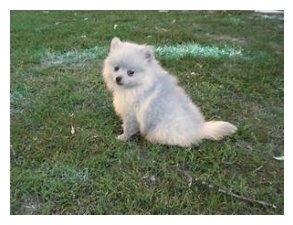

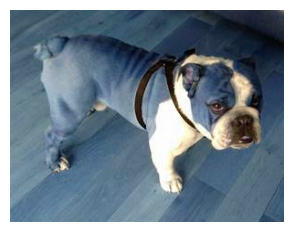

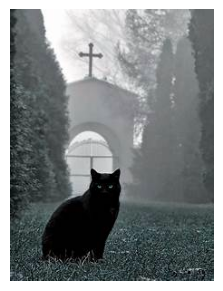

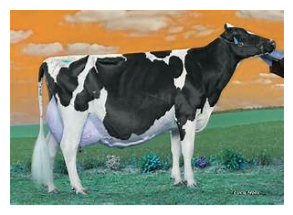

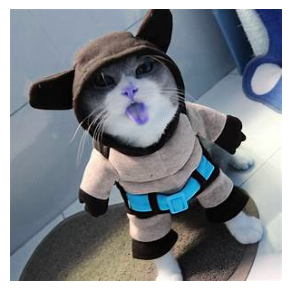

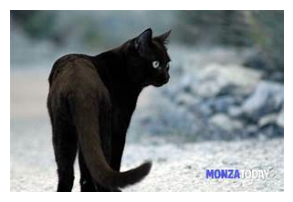

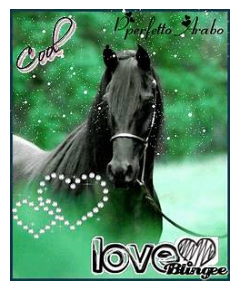

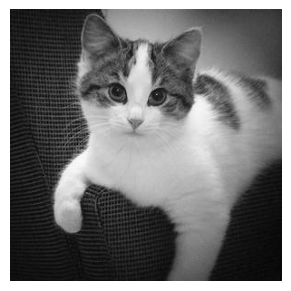

In [79]:
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2

images = glob("/kaggle/input/animal-dataset/train/**/**")
for i in range (8):
    Image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(Image))
    plt.axis('off')

## Preparing Data

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 48
batch_size = 32
datagen_train = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  
    rotation_range=20   
)
train_generator = datagen_train.flow_from_directory("/kaggle/input/animal-dataset/train",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode= "categorical",
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(rescale=1./255)
validation_generator = datagen_train.flow_from_directory("/kaggle/input/animal-dataset/test",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode= "categorical",
                                                    shuffle=True)




Found 3360 images belonging to 7 classes.
Found 13427 images belonging to 7 classes.


In [81]:
from tensorflow.keras.layers import BatchNormalization, Dropout, Conv2D, Activation, MaxPooling2D

def Convolution(input_tensor, filter, kernel_size):
    x = Conv2D(filters=filter, kernel_size=kernel_size, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.25)(x)

    return x


In [82]:
from tensorflow.keras.layers import Dense, Dropout


def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)

    return x

In [83]:
from tensorflow.keras.layers import Flatten, Input
from tensorflow.keras.models import Model

def model_fer(inputs):
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1 ,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)

    dense_1 = Dense_f(flatten,256)

    output = Dense(7,activation= "softmax")(dense_1)
    model = Model(inputs = [inputs], outputs = [output])  # Use 'inputs' instead of 'input'
    
    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])

    return model

In [84]:
input_shape = (48,48,1)
input_layer = Input(shape=input_shape)
model = model_fer(input_layer)
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,309,063 (4.99 MB)

 Trainable params: 1,308,103 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

## Initiating the model

In [85]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)


epochs = 75
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model.weights.keras", monitor='val_accuracy', save_best_only=True, mode='auto', verbose=1)

# Add it to your callbacks
callbacks = [checkpoint, early_stopping]

In [86]:
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val


In [87]:
from tensorflow.keras.optimizers import Adam

# Define your learning rate
learning_rate = 0.0001

# Create your optimizer
optimizer = Adam(learning_rate=learning_rate)

# Compile your model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1_score])


## Training the model

In [88]:
history = model.fit(
    x = train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

Epoch 1/75


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 98/105 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.2148 - f1_score: 0.1024 - loss: 2.1512
Epoch 1: val_accuracy improved from -inf to 0.29721, saving model to model.weights.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 57s 443ms/step - accuracy: 0.2168 - f1_score: 0.1030 - loss: 2.1409 - val_accuracy: 0.2972 - val_f1_score: 0.0000e+00 - val_loss: 1.8798
Epoch 2/75


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.29721
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - f1_score: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1579 - val_f1_score: 0.0000e+00 - val_loss: 2.0268
Epoch 3/75
 98/105 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.2956 - f1_score: 0.1181 - loss: 1.8540
Epoch 3: val_accuracy did not improve from 0.29721
105/105 ━━━━━━━━━━━━━━━━━━━━ 46s 433ms/step - accuracy: 0.2962 - f1_score: 0.1184 - loss: 1.8517 - val_accuracy: 0.2968 - val_f1_score: 8.6787e-04 - val_loss: 1.8817
Epoch 4/75

Epoch 4: val_accuracy improved from 0.29721 to 0.42105, saving model to model.weights.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - f1_score: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4211 - val_f1_score: 0.0000e+00 - val_loss: 1.6671
Epoch 5/75
 98/105 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.3149 - f1_score: 0.1281 - loss: 1.8093
Epoch 5: val_accuracy did not improve from 0.42105
105/105 ━━━━━━

In [89]:
model.evaluate(validation_generator)

420/420 ━━━━━━━━━━━━━━━━━━━━ 39s 93ms/step - accuracy: 0.3002 - f1_score: 0.2691 - loss: 1.9369


[1.9417561292648315, 0.2976837754249573, 0.26846030354499817]

## Plotting Accuracy

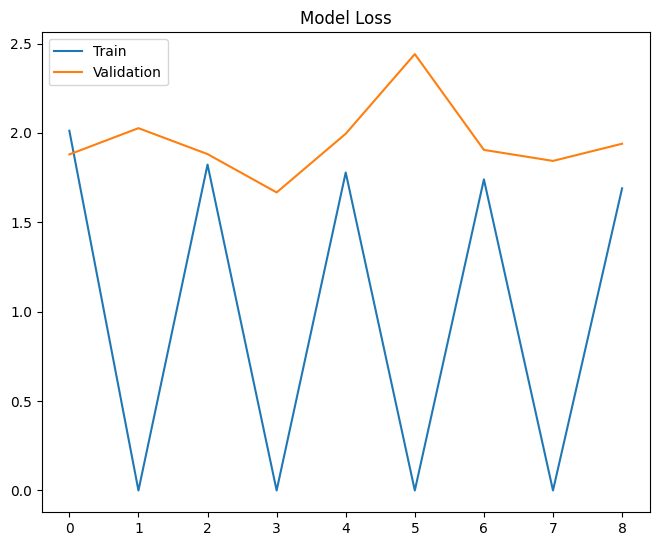

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)

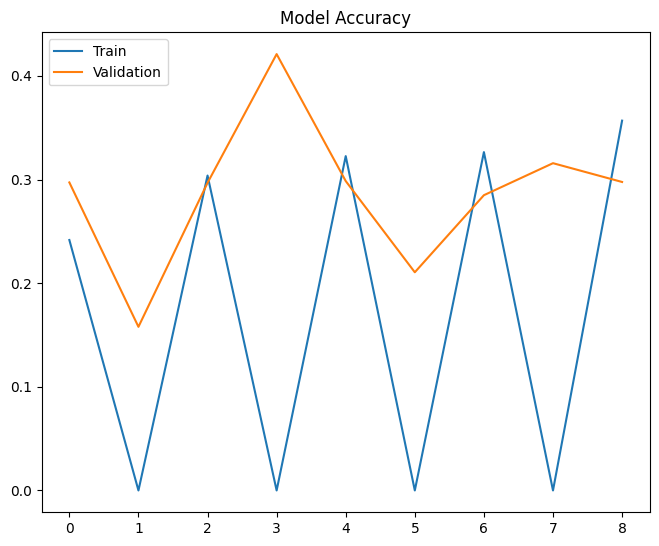

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)

In [92]:
model_json = model.to_json()
with open("kaggle_Animal_Identification_model.json","w") as json_file:
    json_file.write(model_json)

In [93]:
import numpy as np

# Get the true labels
y_true = validation_generator.classes

# Use the model to predict the output
y_pred = model.predict(validation_generator)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)


420/420 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step


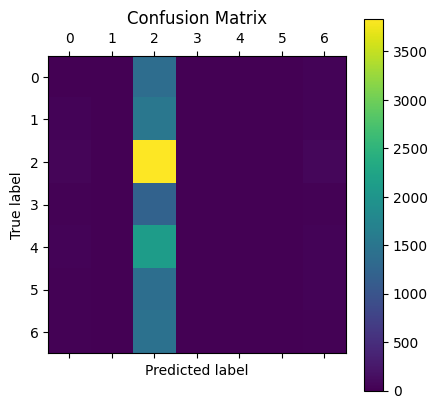

In [94]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [95]:
from sklearn.metrics import classification_report

# Generate and print the classification report
report = classification_report(y_true, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.07      0.01      0.02      1432
           1       0.22      0.00      0.00      1597
           2       0.30      0.96      0.45      3988
           3       0.11      0.00      0.01      1263
           4       0.00      0.00      0.00      2202
           5       0.30      0.00      0.01      1456
           6       0.10      0.02      0.03      1489

    accuracy                           0.29     13427
   macro avg       0.16      0.14      0.07     13427
weighted avg       0.18      0.29      0.14     13427



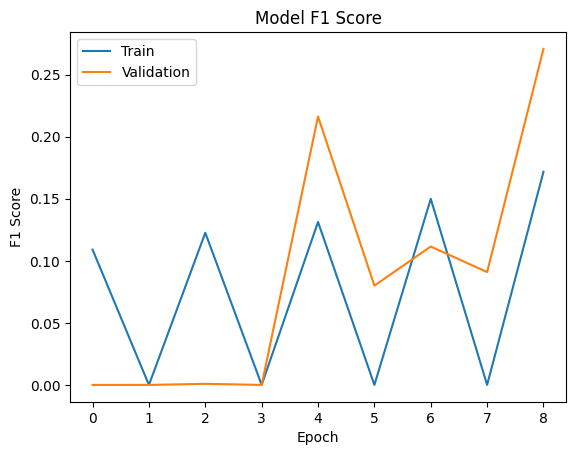

In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Plotting F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


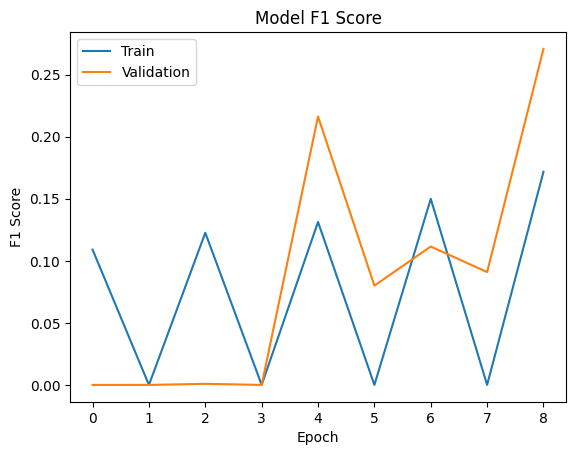

In [97]:
import matplotlib.pyplot as plt

plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
